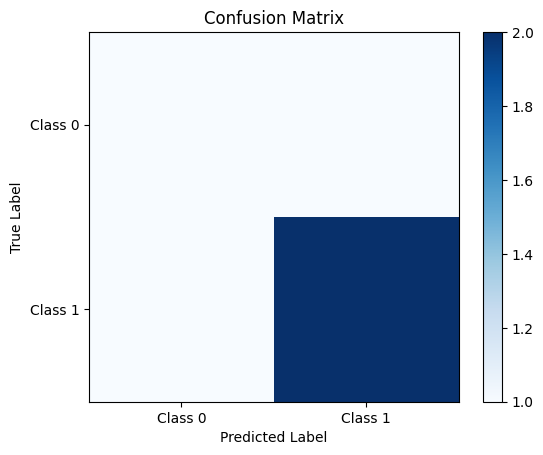

In [1]:
import os
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score




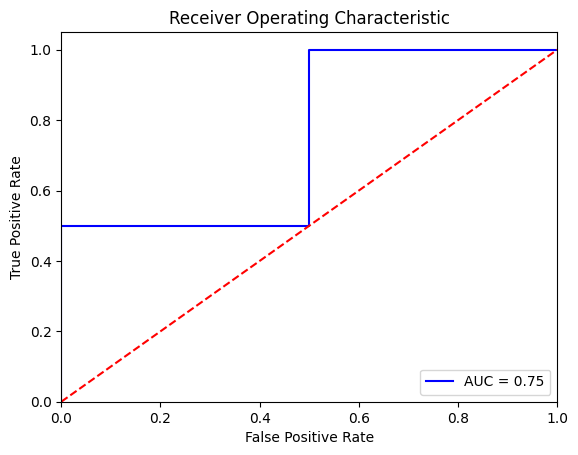

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc




In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [6]:
df = pd.read_csv('modified_categorized_reviews15.csv', engine='python',usecols=['Base_Reviews','category'])
df = df[pd.notnull(df['category'])]
print(df.head())
print(df['Base_Reviews'].astype(str).apply(lambda x: len(x.split(' '))).sum())
df.groupby('category').count()

                                        Base_Reviews  \
0  I have a Canon Pixma MG7520 and this app will ...   
1  The print quality is terrible. Doesn't seem to...   
2                  Wasn't compatible with my printer   
3  Unable to get it to print from any of my andro...   
4  I thought this was finally going to be a great...   

                          category  
0  Compatibility and Device Issues  
1  Compatibility and Device Issues  
2  Compatibility and Device Issues  
3  Compatibility and Device Issues  
4       Functionality and Features  
535320


,Base_Reviews
category,
Compatibility and Device Issues,865
Customer Support and Responsiveness,652
Functionality and Features,3878
Performance and Stability,2289
Security and Privacy Concerns,146
User Interface and UX,1140


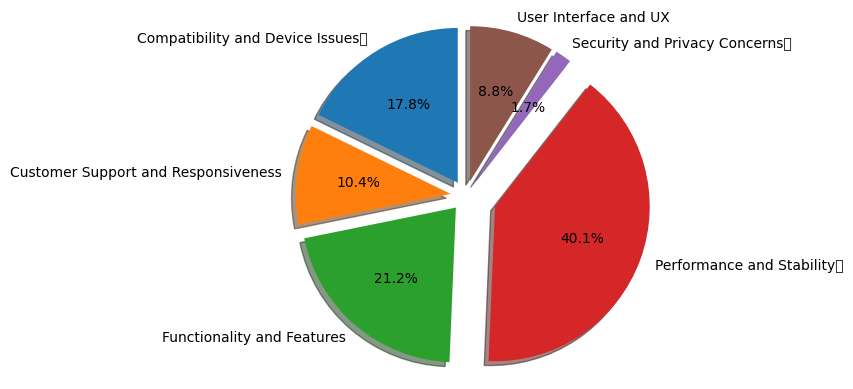

In [7]:
labels  = Emotions = 'Compatibility and Device Issues	','Customer Support and Responsiveness','Functionality and Features','Performance and Stability	','Security and Privacy Concerns	','User Interface and UX'
sizes =[979,573,1165,2209,94,487]
explode =(0.1,0.1,0.1,0.2,0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels =labels , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

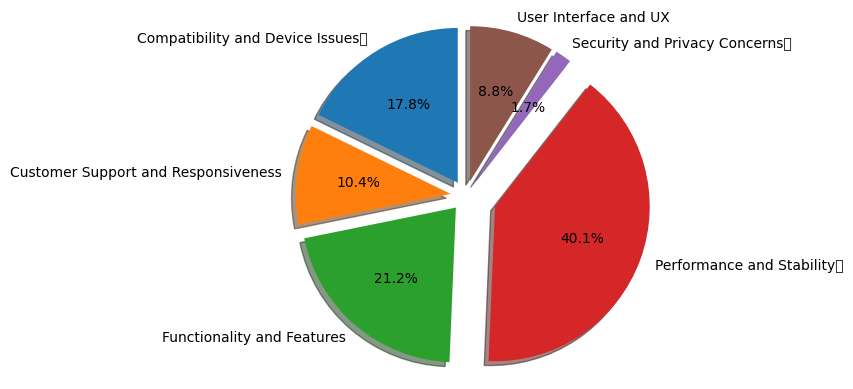

In [8]:
labels  = Emotions = 'Compatibility and Device Issues','Customer Support and Responsiveness','Functionality and Features','Performance and Stability','Security and Privacy Concerns','User Interface and UX'
sizes =[979,573,1165,2209,94,487]
explode =(0.1,0.1,0.1,0.2,0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels =labels , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## clean_text
clean the text by removing special characters, punctuations, etc.

In [9]:
import spacy
from bs4 import BeautifulSoup

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Modify the stop words list as necessary (e.g., add or remove specific words)
# For this example, we'll simply use spacy's default stop words
STOPWORDS = nlp.Defaults.stop_words

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text  # HTML decoding
    doc = nlp(text, disable=["parser", "ner"])  # Tokenization (and optionally disable unnecessary components)
    
    # Convert tokens to lowercase (if they're not punctuation) and remove stop words
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Example
text = "<p>This is a sample text with some @random, symbols; and stopwords like 'the', 'and'.</p>"
print(clean_text(text))




sample text @random symbols stopwords like


In [10]:
#!pip install spacy
#!pip install lxml
#import sys
#print(sys.executable)
#!pip install lxml
#!pip install spacy


In [11]:
#!python -m spacy download en_core_web_sm
#!pip install nltk


In [12]:
# Text Pre-processing (text cleaning techniques)
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

[nltk_data] Error loading stopwords: Remote end closed connection
[nltk_data]     without response


In [13]:
def print_plot(index):
    example = df[df.index == index][['Base_Reviews', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('category:', example[1])
print_plot(1)

The print quality is terrible. Doesn't seem to be compatible with my printer. Waste of money
category: Compatibility and Device Issues


In [14]:
# We want to show a look a Clean text and lables as you wanna.(After text_Preprocessing)
df['Base_Reviews'] = df['Base_Reviews'].astype(str).apply(clean_text)
print_plot(1) # 4567

print quality terrible doesnt seem compatible printer waste money
category: Compatibility and Device Issues


In [15]:
def clean_text(text):
    """ clean the text by removing special characters, punctuations, etc. """
    text = text.lower()
    remove_xx_seq  = re.compile('xx+')
    replace_by_space = re.compile('[/(){}\[\]\|@,;]')
    remove_special_characters = re.compile('[^0-9a-z +]')
    remove_extra_space = re.compile('[^A-Za-z0-9]+')
    remove_numbers = re.compile('[0-9]+')
    text = re.sub(remove_xx_seq, ' ', text)
    text = re.sub(replace_by_space, ' ', text)
    text = re.sub(remove_special_characters, ' ', text)
    text = re.sub(remove_numbers, ' ', text)
    text = re.sub(remove_extra_space, ' ', text)
    return text.strip()

## preprocess_corpus
Preprocess the entire corpus including cleaning the text documents and return the updated dataframe.

In [16]:
def preprocess_corpus(df, column='text'):
    """ Preprocess the entire corpus including cleaning the text documents and return the updated dataframe. """
    df[column] = df[column].apply(clean_text)
    return df

## Encode_labels
Encode the class labels into a numbers.

In [17]:
def encode_labels(labels):
    """ Encode the class labels into a numbers. """
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(labels)
    #label_encoder.get_vocabulary()
    return label_encoder


## Compute_tfidf
 Calculate the tfidf features for all the text documents and return a (documents, fatures) matrix. 

In [18]:
def compute_tfidf(corpus, stop_words='english', ngram_range=(1, 1), max_features=None):
    """ Calculate the tfidf features for all the text documents and return a (documents, fatures) matrix. """
    vectorizer = TfidfVectorizer(input='content', stop_words=stop_words, ngram_range=ngram_range, min_df=3, max_df=0.9, max_features=max_features)
    print('Computing tfidf features...', end='')
    X = vectorizer.fit_transform(corpus)
    print('done!')
    return X, vectorizer

## Count Vectorizer

In [19]:
# def compute_count(corpus, stop_words='english', ngram_range=(1, 1), max_features=None):
#     """ Calculate the Count Vectorizer features for all the text documents and return a (documents, fatures) matrix. """
#     vectorizer = CountVectorizer(input='content', stop_words=stop_words, ngram_range=ngram_range, min_df=3, max_df=0.9, max_features=max_features)
#     print('Computing tfidf features...', end='')
#     X = vectorizer.fit_transform(corpus)
#     print('done!')
#     return X, vectorizer

## Train_test_model
Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports.

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
alg_accuracy= []
alg_p_r_f_score =[]

def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    """ Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports. """
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    ####javed####
    alg_accuracy= accuracy_score(predictions, y_test)
    alg_p_r_f_score = precision_recall_fscore_support(y_test,predictions, average=None)
     ####javed####
    f1score = f1_score(y_test, predictions, average='weighted', pos_label=4)
    confusionMatrix = confusion_matrix(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted', pos_label=4)
    precision = precision_score(y_test, predictions, average='weighted', pos_label=4)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
#    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    return predictions, accuracy, precision, recall, f1score, alg_accuracy, alg_p_r_f_score
    #return  predictions, accuracy, tpr, fpr

Number of categories:  ['Compatibility and Device Issues' 'Functionality and Features'
 'Customer Support and Responsiveness' 'Security and Privacy Concerns'
 'Performance and Stability' 'User Interface and UX']



<Axes: title={'center': 'Categories vs Number of reviews'}, xlabel='category'>

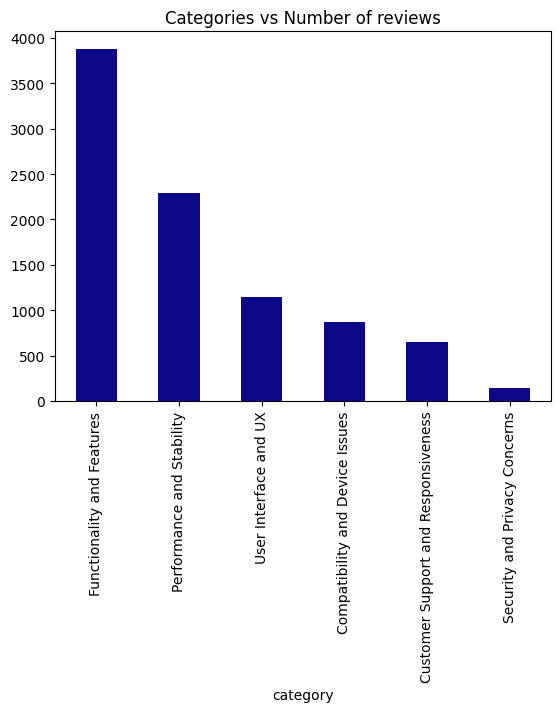

In [21]:
categories = df.category.unique()
print('Number of categories: ', categories)
print()
df.category.value_counts().plot(kind='bar', title='Categories vs Number of reviews', cmap='plasma')

# Setting for model TFIDF Features

In [22]:
# Create tfidf features from the text
stop_words    = 'english'
ngram_range   = (1, 1)
max_features  = None
X, vectorizer = compute_tfidf(df['Base_Reviews'].apply(lambda x: np.str_(x)), stop_words, ngram_range, max_features)
#X, vectorizer = compute_count(df['Base_Reviews'].apply(lambda x: np.str_(x)), stop_words, ngram_range, max_features)

# Encode the labels
labels = df.category.unique()
label_encoder = encode_labels(labels)
y = label_encoder.transform(df.category)
print(X)
print(vectorizer)
print(y)

Computing tfidf features...done!
  (0, 1080)	0.14918810471013408
  (0, 2734)	0.1936839143529729
  (0, 1603)	0.2567214332395095
  (0, 1602)	0.23630417734761086
  (0, 3133)	0.17505240967191493
  (0, 1252)	0.16310908060752619
  (0, 194)	0.10898187984607532
  (0, 2161)	0.1250896852536196
  (0, 4835)	0.13085095096783358
  (0, 2258)	0.16739513363255262
  (0, 3051)	0.15096190385190278
  (0, 1738)	0.15395274780495086
  (0, 4388)	0.16634925309746482
  (0, 3741)	0.7417095001393118
  (0, 5479)	0.090042108792479
  (0, 429)	0.044190234817575724
  (0, 838)	0.23283477511073195
  (1, 3155)	0.3002886598799027
  (1, 5389)	0.3427387860960527
  (1, 1552)	0.22254750470456755
  (1, 4936)	0.33931750132478156
  (1, 3851)	0.33641115540770383
  (1, 3739)	0.4438451959652122
  (1, 1080)	0.3532303300645728
  (1, 3741)	0.43903348067743364
  :	:
  (8969, 1539)	0.2485057394980968
  (8969, 5501)	0.21718076988540938
  (8969, 5312)	0.17482765884661472
  (8969, 4157)	0.17429468601840084
  (8969, 5393)	0.19565689692028998

## Import Oversampling and Under-sampling methods

In [23]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
sm = SMOTE()
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

In [24]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [25]:
import sklearn
print(sklearn.__version__)


1.3.2


In [26]:
!pip install --upgrade scikit-learn



In [27]:
import sklearn
print(sklearn.__version__)


1.3.2


In [28]:
import numpy as np
import time
from scipy import interp
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming skfold, sm, train_test_model, X, y, and labels are defined elsewhere in your code

nb_model = MultinomialNB()

accs = []
f1 = []
pr = []
re = []
accuracy_ = []
P_r_f = []
roc_auc_one = []
tprs_one_nb = []
mean_fpr = np.linspace(0, 1, 100)

st_time = time.time()

for train_index, test_index in skfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    predictions, accuracy, precision, recall, f1score, alg_accuracy, alg_p_r_f_score = train_test_model(nb_model, X_train_res, X_test, y_train_res, y_test, labels)

    fpr_one, tpr_one, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 3], pos_label=3)
    tprs_one_nb.append(interp(mean_fpr, fpr_one, tpr_one))
    roc_auc_one.append(auc(fpr_one, tpr_one))

    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    accs.append(accuracy)
    f1.append(f1score)
    pr.append(precision)
    re.append(recall)

en_time = time.time()

print('Total time: {:.2f}s'.format(en_time - st_time))
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 score: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

mean_tpr = np.mean(tprs_one_nb, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
print('Mean AUC: {:.2f}'.format(mean_auc))

mean_accuracy = np.mean(accuracy_, axis=0)
print("The average accuracy of MNB is", mean_accuracy)

mean_p_r_f = np.mean(P_r_f, axis=0)
print("The precision, recall, f are", mean_p_r_f)

unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")
#plt.show()


Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 12.93s
mean accuracy: 0.62 %
mean f1 score: 0.63 %
mean precision: 0.64 %
mean recall: 0.62 %
Mean AUC: 0.88
The average accuracy of MNB is 0.621850613154961
The precision, recall, f are [[5.93282185e-01 4.68031390e-01 6.87811040e-01 7.63102836e-01
  2.55731714e-01 4.03028126e-01]
 [6.45121625e-01 6.24242424e-01 6.60899997e-01 6.50067034e-01
  3.61904762e-01 4.46491228e-01]
 [6.17282677e-01 5.33648084e-01 6.73900577e-01 7.01757165e-01
  2.98433967e-01 4.23063681e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.

In [29]:
#!pip install --upgrade scikit-learn


# Oversampling

### MultinomialNB

In [30]:
from scipy import interp
nb_model = MultinomialNB()
from sklearn.metrics import f1_score, recall_score,precision_score

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []
#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
#n1 roc_auc_four = []

tprs_zero_nb = []
tprs_one_nb = []
tprs_two_nb = []
tprs_three_nb = []
#n1 tprs_four_nb = []

mean_fpr = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre,alg_accuracy, alg_p_r_f_score  = train_test_model(nb_model, X_train_res, X_test, y_train_res, y_test, labels)
    #print("the accuracy is",alg_accuracy)
    #break
   # fpr_zero, tpr_zero, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,3], pos_label=3)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=3)
    #fpr_four, tpr_four, _____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=4)
    
    tprs_one_nb.append(interp(mean_fpr, fpr_one, tpr_one))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    #roc_auc_four = (auc(fpr_four, tpr_four))
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
      
en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four = sum(roc_auc_four) / len(roc_auc_four)
#print("\nROC across folds for four: ", roc_four)

mean_tpr = np.mean(tprs_one_nb, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MNB is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr)
#print(mean_fpr)
print(mean_auc)
#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 13.64s
mean accuracy: 0.62 %
mean f1 socre: 0.63 %
mean precision: 0.64 %
mean recall: 0.62 %
the average accuracy of MNB is 0.6226309921962097
the presion, recall, f are [[5.84803157e-01 4.67277436e-01 6.92926702e-01 7.56270108e-01
  2.54875845e-01 4.06620736e-01]
 [6.42809409e-01 6.10396270e-01 6.63735715e-01 6.51375163e-01
  3.62380952e-01 4.50000000e-01]
 [6.11404649e-01 5.28116763e-01 6.77789509e-01 6.99468361e-01
  2.96583688e-01 4.26697163e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.1

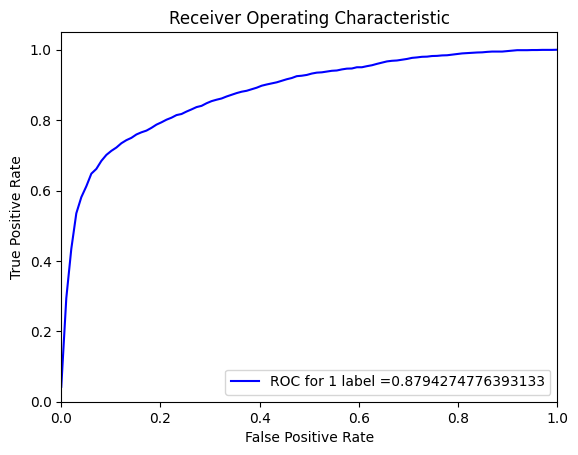

In [31]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(mean_fpr, mean_tpr, 'b', label= "ROC for 1 label =" +str(mean_auc))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [32]:
log_model = LogisticRegression(penalty='l2', max_iter=500)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(log_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LR is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(log_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 27.07s
mean accuracy: 0.74 %
mean f1 socre: 0.72 %
mean precision: 0.77 %
mean recall: 0.74 %

ROC across folds for zero:  0.5041847542432254

ROC across folds for one:  0.8519683645002132

ROC across folds for two:  0.44655570206676876

ROC across folds for three:  0.4111766011298372

ROC across folds for four:  0.6561741606168074
the average accuracy of LR is 0.7370122630992195
the presion, recall, f are [[8.54599412e-01 8.49841919e-01 6.72643937e-01 8.12891970e-01
  9.00000000e-01 8.65717340e-01]
 [6.23188987e-01 5.50559441e-01 9

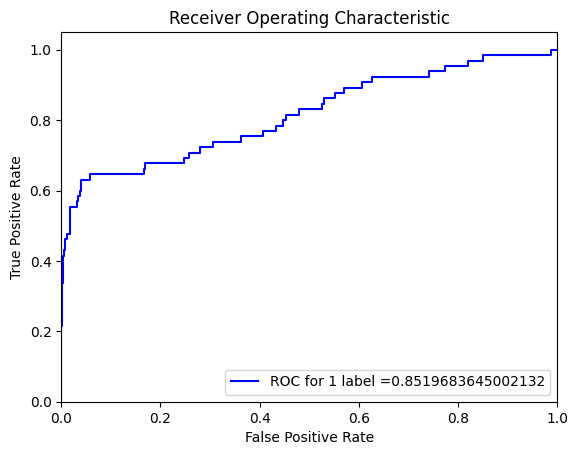

In [33]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LinearSVC

In [34]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_svm = []

tprs_zero_svm = []
tprs_one_svm = []
tprs_two_svm = []
tprs_three_svm = []
tprs_four_svm = []

mean_fpr_svm = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(svm, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=3)
    fpr_four_svm, tpr_four_svm, _____ = roc_curve(y_test, svm.decision_function (X_test)[:,3], pos_label=3)

    tprs_four_svm.append(interp(mean_fpr_svm, fpr_four_svm, tpr_four_svm))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_svm, tpr_four_svm))
    
    
     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_svm = sum(roc_auc_four_svm) / len(roc_auc_four_svm)
#print("\nROC across folds for four: ", roc_four_svm)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LSV is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

mean_tpr_svm = np.mean(tprs_four_svm, axis=0)
mean_auc_svm = auc(mean_fpr_svm, mean_tpr_svm)

#print(mean_tpr_svm)
#print(mean_fpr_svm)
#print(mean_auc_svm)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(svm, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 13.52s
mean accuracy: 0.82 %
mean f1 socre: 0.82 %
mean precision: 0.83 %
mean recall: 0.82 %
the average accuracy of LSV is 0.8231884057971015
the presion, recall, f are [[  0.80421447   0.72350972   0.8717549    0.86504395   0.61832057
    0.72002181]
 [  0.84043037   0.84195804   0.81769626   0.83702597   0.94666667
    0.7745614 ]
 [  0.82168667   0.77742079   0.84369931   0.85051489   0.74638077
    0.74544163]
 [ 86.5         65.2        387.8        228.9         14.6
  114.        ]]
[(0, 3490), (1, 3490), (2, 3490), (3, 349

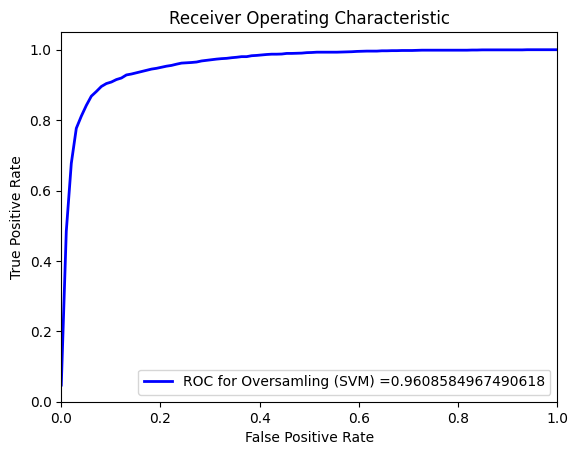

In [35]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_svm, mean_tpr_svm, 'b', label= "ROC for Oversamling (SVM) =" +str(mean_auc_svm),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_rf = []

tprs_zero_rf = []
tprs_one_rf = []
tprs_two_rf = []
tprs_three_rf = []
tprs_four_rf = []

mean_fpr_rf = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #Oversampling
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(rf_model, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_rf, tpr_four_rf, _____ = roc_curve(y_test, rf_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_rf.append(interp(mean_fpr_rf, fpr_four_rf, tpr_four_rf))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_rf, tpr_four_rf))
    
        #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_rf = sum(roc_auc_four_rf) / len(roc_auc_four_rf)
#print("\nROC across folds for four: ", roc_four_rf)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of RF is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


mean_tpr_rf = np.mean(tprs_four_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

#print(mean_tpr_rf)
#print(mean_fpr_rf)
#print(mean_auc_rf)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(rf_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 74.18s
mean accuracy: 0.94 %
mean f1 socre: 0.94 %
mean precision: 0.94 %
mean recall: 0.94 %
the average accuracy of RF is 0.9418060200668895
the presion, recall, f are [[  0.94576191   0.95078728   0.9410782    0.94663451   0.97041667
    0.93242936]
 [  0.93291901   0.92016317   0.96080743   0.95239217   0.93333333
    0.87631579]
 [  0.93905486   0.93411602   0.94963738   0.94885132   0.94094497
    0.89934823]
 [ 86.5         65.2        387.8        228.9         14.6
  114.        ]]
[(0, 3490), (1, 3490), (2, 3490), (3, 3490

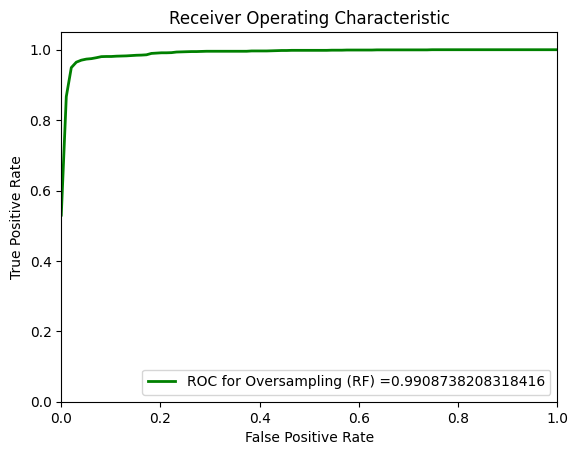

In [37]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one, tpr_one, 'b', color='red', label= "Oversampling =" +str(roc_one))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', color='green', label= "ROC for Oversampling (RF) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=3)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()

mean_fpr_rf = np.linspace(0,1,100)              # change the name of classifier

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(knn_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, knn_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of KNN is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


mean_tpr_rf = np.mean(tprs_four_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(knn_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 230.44s
mean accuracy: 0.34 %
mean f1 socre: 0.25 %
mean precision: 0.66 %
mean recall: 0.34 %

ROC across folds for zero:  0.4895777077033207

ROC across folds for one:  0.7298935955249739

ROC across folds for two:  0.4737498769273074

ROC across folds for three:  0.4717370099349895

ROC across folds for four:  0.49415221933746445
the average accuracy of KNN is 0.3443701226309922
the presion, recall, f are [[7.05905289e-01 6.73080808e-01 7.80829207e-01 3.10920300e-01
  7.00000000e-01 8.88173913e-01]
 [1.99973269e-01 1.07599068e-01

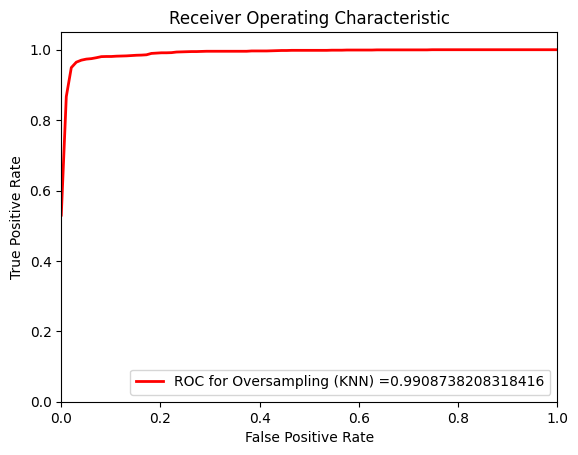

In [39]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', color='red', label= "ROC for Oversampling (KNN) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multilayer Perceptron

In [40]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []

tprs_zero_mlp = []
tprs_one_mlp = []
tprs_two_mlp = []
tprs_three_mlp = []
tprs_four_mlp = []

mean_fpr_mlp = np.linspace(0,1,100)


st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(mlp_model, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_mlp, tpr_four_mlp, _____ = roc_curve(y_test, mlp_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_mlp.append(interp(mean_fpr_mlp, fpr_four_mlp, tpr_four_mlp))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_mlp, tpr_four_mlp))
    
        
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four = sum(roc_auc_four) / len(roc_auc_four)
#print("\nROC across folds for four: ", roc_four)
mean_tpr_mlp = np.mean(tprs_four_mlp, axis=0)
mean_auc_mlp = auc(mean_fpr_mlp, mean_tpr_mlp)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MLP is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_mlp)
#print(mean_fpr_mlp)
print(mean_auc_mlp)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(mlp_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2370.13s
mean accuracy: 0.94 %
mean f1 socre: 0.94 %
mean precision: 0.94 %
mean recall: 0.94 %
the average accuracy of MLP is 0.935340022296544
the presion, recall, f are [[  0.90489185   0.89080397   0.95748029   0.94458117   0.94422619
    0.8935644 ]
 [  0.94314354   0.93540793   0.92988092   0.95282885   0.92666667
    0.91403509]
 [  0.92350343   0.91234578   0.94344709   0.9485969    0.92968955
    0.90354289]
 [ 86.5         65.2        387.8        228.9         14.6
  114.        ]]
0.9868440328428629
[(0, 3490), (1, 3490)

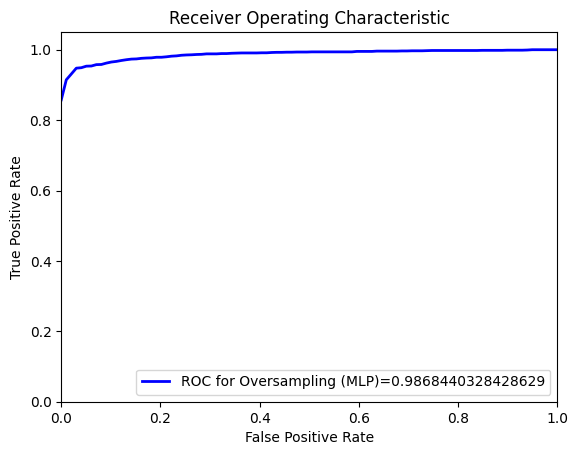

In [41]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one, tpr_one, 'b', color='green', label= "Oversampling =" +str(roc_one))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'b', label= "ROC for Oversampling (MLP)=" +str(mean_auc_mlp),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [42]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(gb_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, gb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of GB is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(gb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 516.99s
mean accuracy: 0.73 %
mean f1 socre: 0.72 %
mean precision: 0.74 %
mean recall: 0.73 %

ROC across folds for zero:  0.37684094749920904

ROC across folds for one:  0.7698679478980089

ROC across folds for two:  0.6348474504886196

ROC across folds for three:  0.34499457381386184

ROC across folds for four:  0.5588519862456118
the average accuracy of GB is 0.7289855072463768
the presion, recall, f are [[7.28481368e-01 6.47536264e-01 6.83941912e-01 8.53145249e-01
  7.69230769e-01 7.62651055e-01]
 [5.99933173e-01 4.02400932e-01

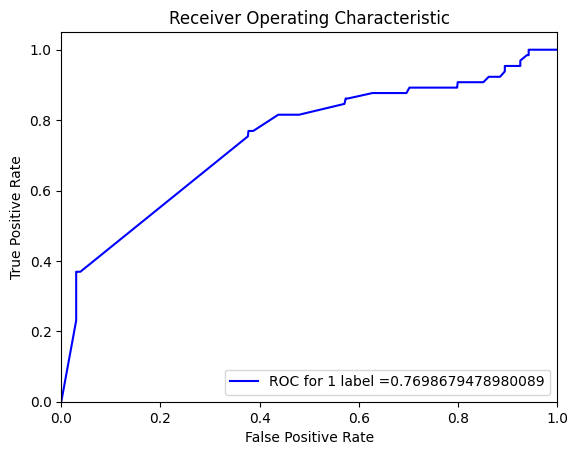

In [43]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ensemble Methods
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. 

### Voting Classifier

In [44]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)

vote_model = VotingClassifier(estimators=[('mlp', mlp_model),('mlp1', mlp_model)], voting='soft')

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

#
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []

tprs_zero_v = []
tprs_one_v = []
tprs_two_v = []
tprs_three_v = []
tprs_four_v = []

mean_fpr_v = np.linspace(0,1,100)
#
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    # X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(vote_model, X_train, X_test, y_train, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    fpr_four_v, tpr_four_v, _____ = roc_curve(y_test, vote_model.predict_proba (X_test)[:,3], pos_label=3)     #
    tprs_four_v.append(interp(mean_fpr_v, fpr_four_v, tpr_four_v))                                             #
    roc_auc_four = (auc(fpr_four_v, tpr_four_v))                                                               #
    

    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time)) 
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#
mean_tpr_v = np.mean(tprs_four_v, axis=0)
mean_auc_v = auc(mean_fpr_v, mean_tpr_v)
#
#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of Voting is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(vote_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2604.28s
mean accuracy: 0.65 %
mean f1 socre: 0.65 %
mean precision: 0.65 %
mean recall: 0.65 %
the average accuracy of Voting is 0.6527313266443702
the presion, recall, f are [[6.87341146e-01 6.45307063e-01 6.81483889e-01 6.80120254e-01
  7.54751082e-01 4.54606259e-01]
 [5.90804598e-01 5.47435897e-01 7.38262207e-01 6.97236268e-01
  3.42380952e-01 4.19298246e-01]
 [6.34722201e-01 5.90709491e-01 7.08621962e-01 6.88057563e-01
  4.64921029e-01 4.34505193e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+0

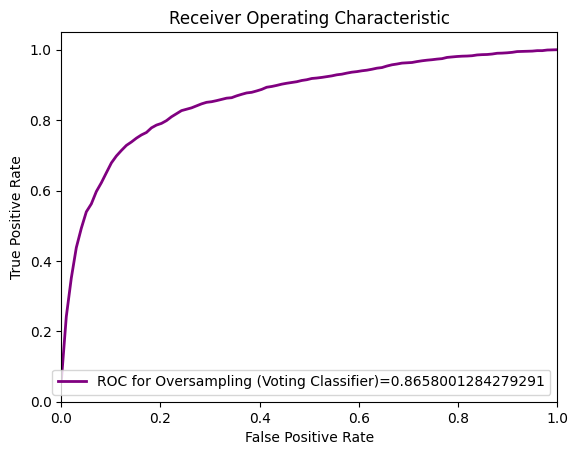

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_v, mean_tpr_v, 'b', color='purple', label= "ROC for Oversampling (Voting Classifier)=" +str(mean_auc_v),lw=2, alpha=1)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AdaBoost
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data.

In [46]:
ada_model = AdaBoostClassifier(n_estimators=500)

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    # X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(ada_model, X_train, X_test, y_train, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
        
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time)) 
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of AdaBoost is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(ada_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 506.44s
mean accuracy: 0.65 %
mean f1 socre: 0.66 %
mean precision: 0.65 %
mean recall: 0.64 %
the average accuracy of AdaBoost is 0.6538461538461539
the presion, recall, f are [[6.18333849e-01 5.30386275e-01 6.47106341e-01 7.64479826e-01
  5.49206349e-01 5.89013757e-01]
 [5.60732424e-01 4.82890443e-01 7.99631050e-01 6.41726040e-01
  1.98095238e-01 4.08771930e-01]
 [5.83370839e-01 4.99963441e-01 7.14822473e-01 6.96505486e-01
  2.69214533e-01 4.80180922e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+

# Undersampling

### MultinomialNB

In [47]:
nb_model = MultinomialNB()

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(nb_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, nb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                 #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of NBM is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 0.71s
mean accuracy: 0.53 %
mean f1 socre: 0.60 %
mean precision: 0.53 %
mean recall: 0.55 %

ROC across folds for zero:  0.528539041832308

ROC across folds for one:  0.804997106610721

ROC across folds for two:  0.425824814648048

ROC across folds for three:  0.5136551671231291

ROC across folds for four:  0.3645005816596174
the average accuracy of NBM is 0.5255295429208472
the presion, recall, f are [[4.99826063e-01 3.45369441e-01 6.59456817e-01 7.73845473e-01
  1.08849141e-01 3.27156259e-01]
 [6.12697140e-01 5.85944056e-01 5.397

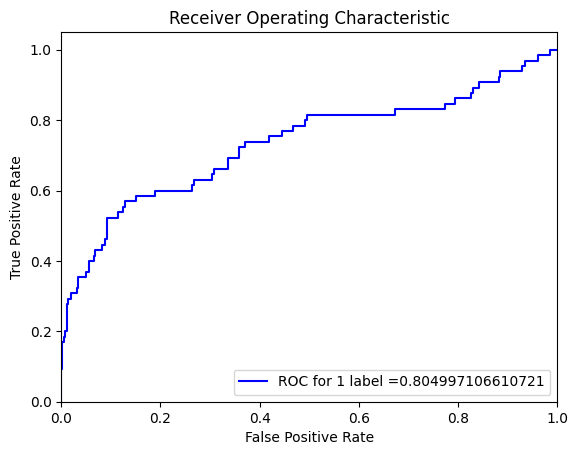

In [48]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [49]:
log_model = LogisticRegression(penalty='l2', max_iter=500)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(log_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, log_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####


    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LR is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(log_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 10.75s
mean accuracy: 0.55 %
mean f1 socre: 0.62 %
mean precision: 0.55 %
mean recall: 0.57 %

ROC across folds for zero:  0.4385246446418556

ROC across folds for one:  0.8218269792454915

ROC across folds for two:  0.48629041268401024

ROC across folds for three:  0.46255504484265514

ROC across folds for four:  0.36942204691112634
the average accuracy of LR is 0.5537346711259754
the presion, recall, f are [[6.06145932e-01 4.35840701e-01 6.87199519e-01 7.24173600e-01
  1.03860803e-01 3.51693427e-01]
 [6.63565891e-01 6.14918415e-01

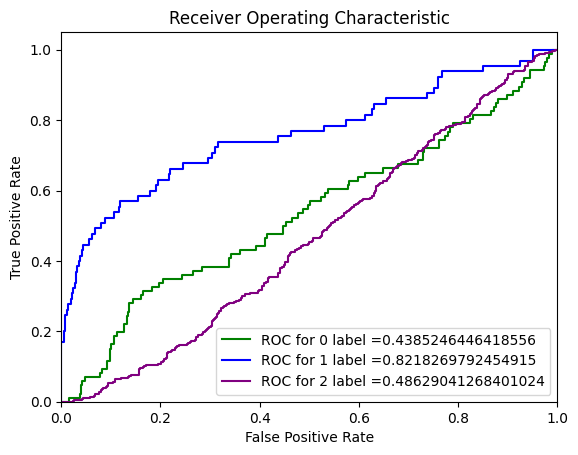

In [50]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LinearSVC

In [51]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_svm = []

tprs_zero_svm_under = []
tprs_one_svm_under = []
tprs_two_svm_under = []
tprs_three_svm_under = []
tprs_four_svm_under = []

mean_fpr_svm_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(svm, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=3)
    fpr_four_under_svm, tpr_four_under_svm, _____ = roc_curve(y_test, svm.decision_function (X_test)[:,3], pos_label=3)

    tprs_four_svm_under.append(interp(mean_fpr_svm_under, fpr_four_under_svm, tpr_four_under_svm))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_under_svm, tpr_four_under_svm))
    
                         #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####


    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_under_svm = sum(roc_auc_four_svm) / len(roc_auc_four_svm)
#print("\nROC across folds for four: ", roc_four_under_svm)

mean_tpr_svm_under = np.mean(tprs_four_svm_under, axis=0)
mean_auc_svm_under = auc(mean_fpr_svm_under, mean_tpr_svm_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of SVC is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_svm_under)
#print(mean_fpr_svm_under)
print(mean_auc_svm_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(svm, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 0.43s
mean accuracy: 0.55 %
mean f1 socre: 0.62 %
mean precision: 0.55 %
mean recall: 0.57 %
the average accuracy of SVC is 0.5472686733556299
the presion, recall, f are [[5.64845401e-01 4.11966794e-01 6.93715724e-01 7.19778103e-01
  1.04326535e-01 3.62398679e-01]
 [6.70462443e-01 6.22610723e-01 4.95608567e-01 6.09434613e-01
  5.38571429e-01 4.62280702e-01]
 [6.11339606e-01 4.94939220e-01 5.77541237e-01 6.59663029e-01
  1.74449284e-01 4.05021585e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.14

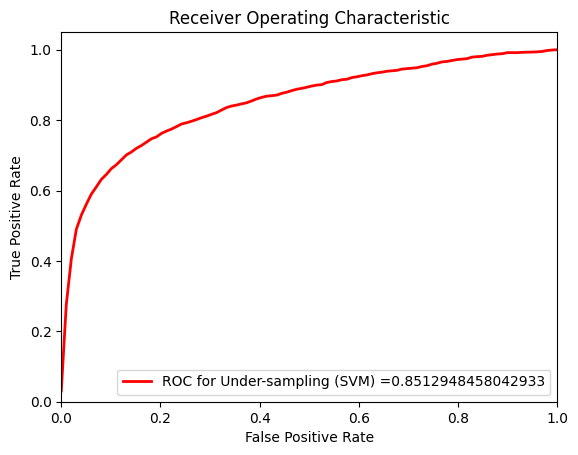

In [52]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_svm_under, mean_tpr_svm_under, 'b', color='red', label= "ROC for Under-sampling (SVM) =" +str(mean_auc_svm_under) ,lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RandomForestClassifier

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_under = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_under = []

tprs_zero_rf_under = []
tprs_one_rf_under = []
tprs_two_rf_under = []
tprs_three_rf_under = []
tprs_four_rf_under = []

mean_fpr_rf_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(rf_model, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_under, tpr_under, __ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_under_rf, tpr_four_under_rf, _____ = roc_curve(y_test, rf_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_rf_under.append(interp(mean_fpr_rf_under, fpr_four_under_rf, tpr_four_under_rf))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_rf, tpr_four_rf))
    
                             #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one_under = sum(roc_auc_under) / len(roc_auc_under)
#print("\nROC across folds for one: ", roc_one_under)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_under_rf = sum(roc_auc_four_under) / len(roc_auc_four_under)
#print("\nROC across folds for four: ", roc_four_under_rf)

mean_tpr_rf_under = np.mean(tprs_four_rf_under, axis=0)
mean_auc_rf_under = auc(mean_fpr_rf_under, mean_tpr_rf_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of RF is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_rf_under)
#print(mean_fpr_rf_under)
print(mean_auc_rf_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(rf_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 3.79s
mean accuracy: 0.59 %
mean f1 socre: 0.65 %
mean precision: 0.59 %
mean recall: 0.61 %
the average accuracy of RF is 0.59041248606466
the presion, recall, f are [[5.56250328e-01 4.98624069e-01 7.30210461e-01 7.02937785e-01
  1.01712072e-01 4.79166454e-01]
 [6.90229885e-01 6.31934732e-01 5.57247796e-01 6.56188233e-01
  5.60000000e-01 4.75438596e-01]
 [6.14638179e-01 5.56333512e-01 6.31751637e-01 6.78181130e-01
  1.71667906e-01 4.75131246e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.14000

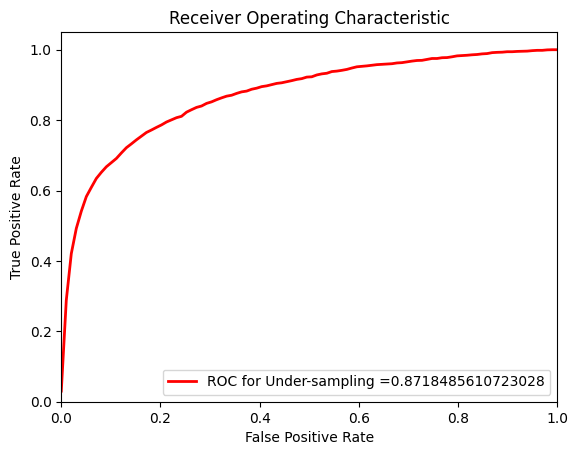

In [54]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_under, tpr_under, 'b', label= "Under-sampling =" +str(roc_one_under))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_rf_under, mean_tpr_rf_under, 'b', color='red', label= "ROC for Under-sampling =" +str(mean_auc_rf_under),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=3)
accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(knn_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, knn_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of KNN is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(knn_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 14.12s
mean accuracy: 0.35 %
mean f1 socre: 0.49 %
mean precision: 0.35 %
mean recall: 0.37 %

ROC across folds for zero:  0.48777725334244204

ROC across folds for one:  0.7069248324436987

ROC across folds for two:  0.4834669595481967

ROC across folds for three:  0.4641921644410689

ROC across folds for four:  0.45032840442078426
the average accuracy of KNN is 0.3528428093645485
the presion, recall, f are [[2.18081746e-01 1.75578686e-01 6.24852135e-01 5.60642053e-01
  1.03631265e-01 2.93436147e-01]
 [5.96658647e-01 4.53916084e-01

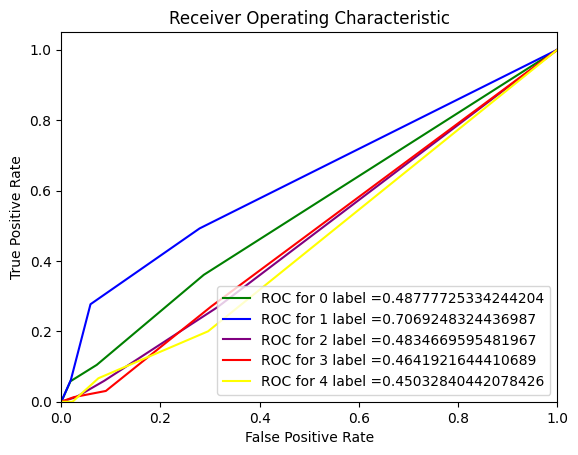

In [56]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### MLPClassifier

In [57]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)
accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one_under = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_mlp = []

tprs_zero_mlp_under = []
tprs_one_mlp_under = []
tprs_two_mlp_under = []
tprs_three_mlp_under = []
tprs_four_mlp_under = []

mean_fpr_mlp_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(mlp_model, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one_under, tpr_one_under, __ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_mlp_under, tpr_four_mlp_under, _____ = roc_curve(y_test, mlp_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_mlp_under.append(interp(mean_fpr_mlp_under, fpr_four_mlp_under, tpr_four_mlp_under))
    
        #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    #roc_auc_four = (auc(fpr_four_mlp_under, tpr_four_mlp_under))

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_mlp_under = sum(roc_auc_one_under) / len(roc_auc_one_under)
#print("\nROC across folds for one: ", roc_mlp_under)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_mlp_under_four = sum(roc_auc_four_mlp) / len(roc_auc_four_mlp)
#print("\nROC across folds for four: ", roc_mlp_under_four)

mean_tpr_mlp_under = np.mean(tprs_four_mlp_under, axis=0)
mean_auc_mlp_under = auc(mean_fpr_mlp_under, mean_tpr_mlp_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MLP is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_mlp_under)
#print(mean_fpr_mlp_under)
print(mean_auc_mlp_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(mlp_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 70.67s
mean accuracy: 0.50 %
mean f1 socre: 0.60 %
mean precision: 0.50 %
mean recall: 0.52 %
the average accuracy of MLP is 0.49955406911928657
the presion, recall, f are [[4.71525756e-01 3.91802363e-01 7.19708823e-01 6.49951585e-01
  1.35138760e-01 3.34156721e-01]
 [6.41526330e-01 6.01072261e-01 3.96080743e-01 5.88464338e-01
  9.60000000e-01 4.48245614e-01]
 [5.42615737e-01 4.74055397e-01 5.10598091e-01 6.17061912e-01
  2.36767870e-01 3.82606236e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.

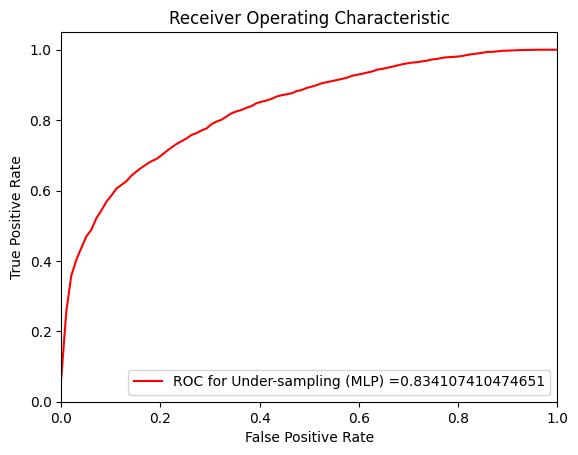

In [58]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one_under, tpr_one_under, 'b', label= "Under-sampling =" +str(roc_mlp_under))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_mlp_under, mean_tpr_mlp_under, 'b', color='red', label= "ROC for Under-sampling (MLP) =" +str(mean_auc_mlp_under))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [59]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(gb_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, gb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of GBC is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(gb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 37.16s
mean accuracy: 0.58 %
mean f1 socre: 0.64 %
mean precision: 0.58 %
mean recall: 0.60 %

ROC across folds for zero:  0.3124929177933654

ROC across folds for one:  0.8088411038333367

ROC across folds for two:  0.5427643591586973

ROC across folds for three:  0.4498906293268208

ROC across folds for four:  0.4383848138475222
the average accuracy of GBC is 0.5843924191750279
the presion, recall, f are [[6.10240470e-01 3.88374984e-01 6.79885925e-01 7.36887013e-01
  1.95975370e-01 4.97015794e-01]
 [6.80874098e-01 6.45594406e-01 5

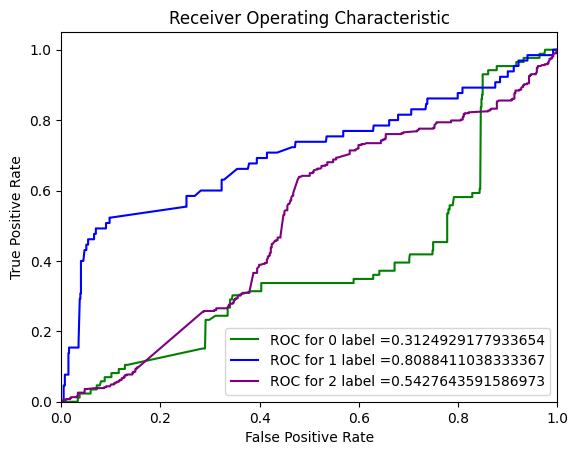

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ensemble Methods
Ensemble methods are techniques that create multiple models and then combine them to produce improved results.

### Voting Classifier

In [61]:
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)
log_model = LogisticRegression(penalty='l2', max_iter=500)

vote_model = VotingClassifier(estimators=[('nb', nb_model), ('rf', rf_model), ('log', log_model)], voting='hard')

accs = []
reports = []
f1 = []
pr = []
re =[]
#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

st_time = time.time()

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(vote_model, X_train_under, X_test, y_train_under, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))


#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of Voting Classifier is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


unique, counts = np.unique(y_train_under, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(vote_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 8.28s
mean accuracy: 0.59 %
mean f1 socre: 0.65 %
mean precision: 0.59 %
mean recall: 0.61 %
the average accuracy of Voting Classifier is 0.5938684503901894
the presion, recall, f are [[5.33012879e-01 4.54279229e-01 7.27858734e-01 7.72459152e-01
  2.23081122e-01 4.04504170e-01]
 [7.32878909e-01 6.77832168e-01 5.52860359e-01 6.06368268e-01
  9.26190476e-01 5.12280702e-01]
 [6.16440736e-01 5.43570951e-01 6.27985194e-01 6.78809203e-01
  3.58994779e-01 4.51655135e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.460

### Ada Boost Classifier
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data.

In [62]:
ada_model = AdaBoostClassifier(n_estimators=500)

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
st_time = time.time()

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(ada_model, X_train_under, X_test, y_train_under, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
    
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of AdaBoost is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####
unique, counts = np.unique(y_train_under, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(ada_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 50.54s
mean accuracy: 0.41 %
mean f1 socre: 0.53 %
mean precision: 0.41 %
mean recall: 0.44 %
the average accuracy of AdaBoost is 0.4141583054626533
the presion, recall, f are [[3.16313851e-01 4.10703122e-01 6.48426360e-01 5.96191129e-01
  7.27629172e-02 3.03368248e-01]
 [5.35298049e-01 4.44708625e-01 4.31186233e-01 2.81804949e-01
  5.81428571e-01 4.91228070e-01]
 [3.94536623e-01 4.26525472e-01 5.12768654e-01 3.81842826e-01
  1.29117440e-01 3.72733368e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+0

# ROC Combine

### ROC for Random Forest

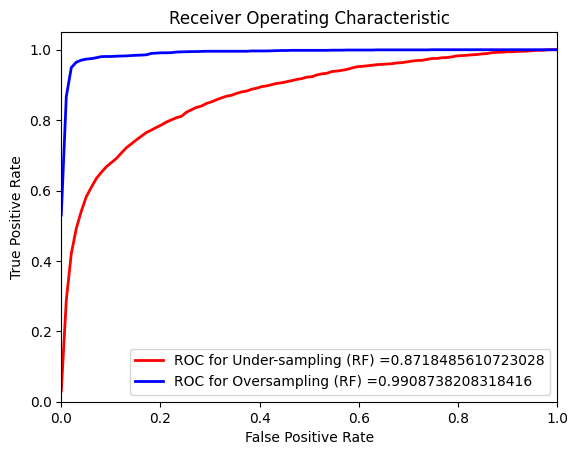

In [63]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_rf_under, mean_tpr_rf_under, 'b', color='red', label= "ROC for Under-sampling (RF) =" +str(mean_auc_rf_under),lw=2, alpha=1)
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', label= "ROC for Oversampling (RF) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC for MLP

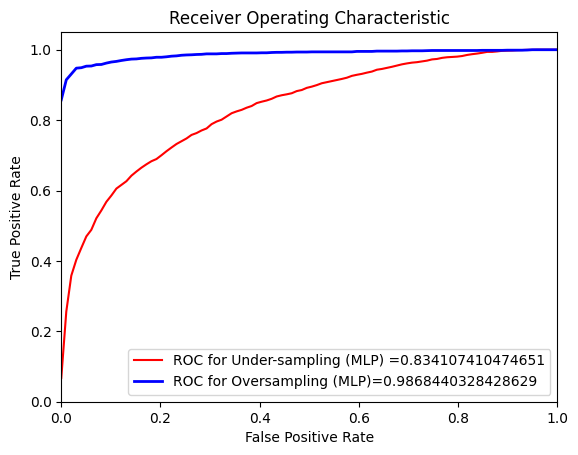

In [64]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_mlp_under, mean_tpr_mlp_under, 'b', color='red', label= "ROC for Under-sampling (MLP) =" +str(mean_auc_mlp_under))
plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'b', label= "ROC for Oversampling (MLP)=" +str(mean_auc_mlp),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC for SVM

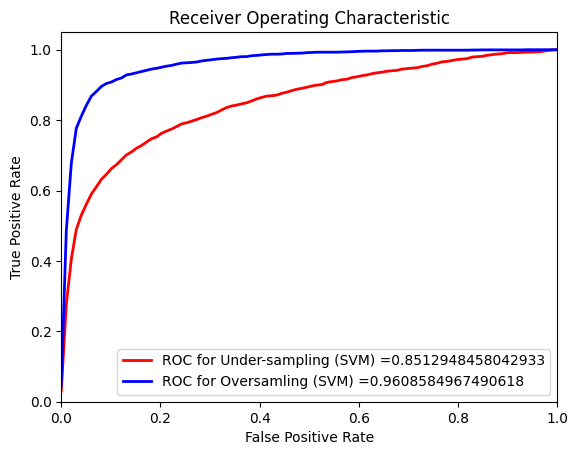

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_svm_under, mean_tpr_svm_under, 'b', color='red', label= "ROC for Under-sampling (SVM) =" +str(mean_auc_svm_under) ,lw=2, alpha=1)
plt.plot(mean_fpr_svm, mean_tpr_svm, 'b', label= "ROC for Oversamling (SVM) =" +str(mean_auc_svm),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()